In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
raw = 'raw'

In [3]:
import pandas as pd

# Calendar

In [4]:
df_calendar = pd.read_csv(f'{raw}/calendar.csv')
df_calendar.head(1)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0


In [5]:
df_calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [6]:
df_calendar['d'].value_counts().min()

1

In [7]:
df_calendar['d'].str.split('_').str[1].astype(int).max()

1969

In [8]:
# No gaps in calendar(!), not sales (－‸ლ)
(pd.to_datetime(df_calendar['date'])-pd.to_datetime(df_calendar['date']).shift(1)).value_counts()

1 days    1968
Name: date, dtype: int64

In [9]:
df_calendar.head(1)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0


In [10]:
df_calendar['event_type_1'].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [11]:
df_calendar['event_type_2'].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [12]:
pd.concat([df_calendar['event_name_1'], df_calendar['event_name_2']]).value_counts()

StPatricksDay          6
NBAFinalsEnd           6
Ramadan starts         6
Cinco De Mayo          6
MemorialDay            6
Mother's day           6
LentWeek2              6
Purim End              6
Pesach End             6
SuperBowl              6
NBAFinalsStart         6
Easter                 6
OrthodoxEaster         6
ValentinesDay          6
Father's day           6
PresidentsDay          6
LentStart              6
MartinLutherKingDay    5
Chanukah End           5
NewYear                5
Halloween              5
IndependenceDay        5
LaborDay               5
ColumbusDay            5
Eid al-Fitr            5
Thanksgiving           5
EidAlAdha              5
Christmas              5
OrthodoxChristmas      5
VeteransDay            5
dtype: int64

# Prices

In [13]:
df_prices = pd.read_csv(f'{raw}/sell_prices.csv')
df_prices.head(1)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58


In [14]:
df_prices['item_id'].value_counts()

HOUSEHOLD_2_222    2820
HOBBIES_1_372      2820
HOUSEHOLD_2_275    2820
HOBBIES_1_319      2820
HOBBIES_1_256      2820
HOUSEHOLD_1_256    2820
HOBBIES_1_390      2820
HOBBIES_1_398      2820
FOODS_3_014        2820
FOODS_3_400        2820
FOODS_2_026        2820
FOODS_1_106        2820
HOUSEHOLD_1_191    2820
FOODS_2_166        2820
HOUSEHOLD_2_239    2820
HOBBIES_1_317      2820
FOODS_3_460        2820
FOODS_1_192        2820
HOBBIES_1_098      2820
FOODS_3_501        2820
HOUSEHOLD_1_136    2820
FOODS_3_020        2820
HOUSEHOLD_2_421    2820
HOUSEHOLD_1_370    2820
FOODS_1_046        2820
HOUSEHOLD_2_380    2820
FOODS_3_611        2820
FOODS_1_219        2820
HOUSEHOLD_1_184    2820
FOODS_3_630        2820
                   ... 
FOODS_3_038         739
HOBBIES_1_125       737
FOODS_3_647         737
FOODS_3_119         735
FOODS_3_472         734
HOUSEHOLD_1_274     734
HOUSEHOLD_1_201     731
FOODS_2_185         731
HOBBIES_2_026       730
HOUSEHOLD_1_208     729
HOBBIES_1_269   

In [15]:
# 10 stores is drop in the bucket vs 329 stores in TX, 167 in CA, 77 in WI as of 2007
df_prices['store_id'].value_counts()

TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [16]:
df_prices['item_id'].str.split('_').str[0].value_counts()

FOODS        3181789
HOUSEHOLD    2375427
HOBBIES      1283905
Name: item_id, dtype: int64

In [17]:
df_prices['item_id'].str.split('_').str[0:2].value_counts()

[FOODS, 3]        1835270
[HOUSEHOLD, 2]    1215130
[HOUSEHOLD, 1]    1160297
[HOBBIES, 1]       960337
[FOODS, 2]         823305
[FOODS, 1]         523214
[HOBBIES, 2]       323568
Name: item_id, dtype: int64

In [18]:
len(df_prices)

6841121

In [19]:
df_prices.head(1)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58


In [20]:
priced_weeks = df_prices\
    .pivot_table(index=['item_id', 'store_id'], aggfunc='count')\
    .reset_index()
priced_weeks.columns = ['item_id', 'store_id', 'count', 'dropme']
priced_weeks.drop('dropme', axis=1, inplace=True)
priced_weeks.head(1)

,item_id,store_id,count
0,FOODS_1_001,CA_1,282


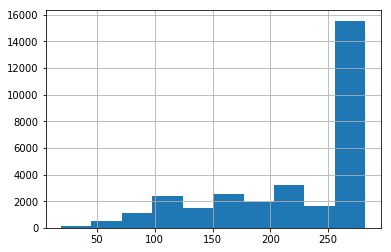

In [21]:
priced_weeks['count'].hist()

In [22]:
# 2/3 of goods are not priced every week & every store
len(priced_weeks.query('count != 282')) / float(len(priced_weeks))

0.6414562151525091

In [23]:
priced_weeks['count'].describe()

count    30490.000000
mean       224.372614
std         68.000808
min         19.000000
25%        173.000000
50%        260.000000
75%        282.000000
max        282.000000
Name: count, dtype: float64

In [24]:
priced_weeks['count'].value_counts()

282    10932
281     1043
280      544
277      301
279      280
276      267
192      252
217      242
278      234
216      223
225      212
275      203
224      196
230      194
273      192
228      188
271      186
272      184
121      182
174      176
175      166
122      161
208      161
229      153
227      153
120      152
207      149
274      149
226      143
191      142
       ...  
60         9
63         8
44         8
19         8
26         8
54         7
48         7
62         7
50         7
51         7
42         6
36         6
49         5
41         5
40         4
58         4
21         3
29         3
69         3
37         3
23         2
45         2
34         2
22         2
53         2
24         1
46         1
30         1
52         1
32         1
Name: count, Length: 259, dtype: int64

In [25]:
priced_weeks[priced_weeks['count'] == 19]

,item_id,store_id,count
12070,FOODS_3_595,CA_1,19
12072,FOODS_3_595,CA_3,19
20218,HOUSEHOLD_1_020,WI_2,19
22732,HOUSEHOLD_1_278,CA_3,19
23061,HOUSEHOLD_1_311,CA_2,19
23807,HOUSEHOLD_1_386,WI_1,19
23923,HOUSEHOLD_1_400,CA_4,19
23971,HOUSEHOLD_1_405,CA_2,19


In [26]:
# looks like an example of something being sold elsewhere and then rolled out to other locations
df_prices.query('item_id == "FOODS_3_595"')['store_id'].value_counts()

TX_3    150
WI_2    149
TX_2    147
CA_4    146
WI_1    144
TX_1    144
WI_3    142
CA_2     89
CA_3     19
CA_1     19
Name: store_id, dtype: int64

In [27]:
df_prices.query('item_id == "FOODS_3_595"')\
    .groupby('store_id')\
    .aggregate({'wm_yr_wk': ['min', 'max']})\
    .reset_index()

store_id wm_yr_wk       
                min    max
0     CA_1    11603  11621
1     CA_2    11437  11621
2     CA_3    11603  11621
3     CA_4    11333  11621
4     TX_1    11335  11621
5     TX_2    11332  11621
6     TX_3    11329  11621
7     WI_1    11335  11621
8     WI_2    11330  11621
9     WI_3    11337  11621

In [28]:
# there seem to be no products in the dataset which got rolled back
df_prices.groupby(['store_id', 'item_id'])\
    .aggregate({'wm_yr_wk': 'max'}).reset_index()\
    .query('wm_yr_wk < 11621')

,store_id,item_id,wm_yr_wk


In [29]:
df_sales_train = pd.read_csv(f"{raw}/sales_train_validation.csv")
df_sales_train.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1


In [30]:
# Unite sales of product x, aggregated for each store: 30,490 in the competitors guide
len(df_sales_train)

30490

In [31]:
# we're expected to produce more stuff here
!wc -l {raw}/sample_submission.csv

   60981 raw/sample_submission.csv


In [32]:
df_sample_submission = pd.read_csv(f'{raw}/sample_submission.csv')
df_sample_submission.columns

Index(['id', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20',
       'F21', 'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28'],
      dtype='object')

In [33]:
df_sample_submission.head(1)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
df_sample_submission['id'].str.split('_').str[0].value_counts()

FOODS        28740
HOUSEHOLD    20940
HOBBIES      11300
Name: id, dtype: int64

In [35]:
priced_items = (df_prices['item_id'] + '_' + df_prices['store_id']).unique()
priced_items

array(['HOBBIES_1_001_CA_1', 'HOBBIES_1_002_CA_1', 'HOBBIES_1_003_CA_1',
       ..., 'FOODS_3_825_WI_3', 'FOODS_3_826_WI_3', 'FOODS_3_827_WI_3'],
      dtype=object)

In [36]:
priced_items_validation = [item + '_validation' for item in priced_items]
priced_items_evaluation = [item + '_evaluation' for item in priced_items]

In [37]:
# ok, so we're not expected to be producing aggregates it's more of a regularization hint
df_sample_submission.query('id not in @priced_items_validation and ' +
                           'id not in @priced_items_evaluation')

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28


In [38]:
sales_columns = [col for col in df_sales_train.columns if 'd_' in col]
sales_columns[0], sales_columns[-1]

('d_1', 'd_1913')

In [39]:
id_columns = [col for col in df_sales_train.columns if 'id' in col]
id_columns

['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']

In [40]:
df_sales_train.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1


In [41]:
%%time
df_sales_train_melt = df_sales_train.melt(
    id_vars=id_columns,
    var_name='day_id',
    value_name='sales'
)

CPU times: user 10.3 s, sys: 3.41 s, total: 13.7 s
Wall time: 13.9 s


In [42]:
df_sales_train_melt.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0


In [43]:
df_sales_train_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 8 columns):
id          object
item_id     object
dept_id     object
cat_id      object
store_id    object
state_id    object
day_id      object
sales       int64
dtypes: int64(1), object(7)
memory usage: 3.5+ GB


In [44]:
%%time
for col in id_columns:
    df_sales_train_melt[col] = df_sales_train_melt[col].astype('category')

CPU times: user 27 s, sys: 7.2 s, total: 34.2 s
Wall time: 35.5 s


In [45]:
df_sales_train_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 8 columns):
id          category
item_id     category
dept_id     category
cat_id      category
store_id    category
state_id    category
day_id      object
sales       int64
dtypes: category(6), int64(1), object(1)
memory usage: 1.3+ GB


In [46]:
%%time
# Note to self: split -> index -> astype(int) was taking ages
mapping = {col: int(col.split('_')[1]) for col in sales_columns}
df_sales_train_melt['day_id'] = df_sales_train_melt['day_id'].map(mapping)

CPU times: user 2.87 s, sys: 383 ms, total: 3.25 s
Wall time: 3.25 s


In [47]:
df_sales_train_melt.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0


In [48]:
df_sales_train_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58327370 entries, 0 to 58327369
Data columns (total 8 columns):
id          category
item_id     category
dept_id     category
cat_id      category
store_id    category
state_id    category
day_id      int64
sales       int64
dtypes: category(6), int64(2)
memory usage: 1.3 GB


In [49]:
df_sales_train_melt[0:1000].describe()

,day_id,sales
count,1000.0,1000.00000
mean,1.0,0.84900
std,0.0,3.37455
min,1.0,0.00000
25%,1.0,0.00000
50%,1.0,0.00000
75%,1.0,0.00000
max,1.0,54.00000


In [50]:
sales_agg = df_sales_train_melt\
    .groupby('id', as_index=False)\
    .agg({'sales': ['min', 'max', 'sum', 'count'], 'day_id': ['min', 'max']})
sales_agg.head(5)

id sales                 day_id      
                                 min max   sum count    min   max
0  FOODS_1_001_CA_1_validation     0  15  1503  1913      1  1913
1  FOODS_1_001_CA_2_validation     0  16  2214  1913      1  1913
2  FOODS_1_001_CA_3_validation     0  24  2302  1913      1  1913
3  FOODS_1_001_CA_4_validation     0   6   688  1913      1  1913
4  FOODS_1_001_TX_1_validation     0  24  1119  1913      1  1913

In [51]:
sales_agg.columns

MultiIndex(levels=[['sales', 'day_id', 'id'], ['count', 'max', 'min', 'sum', '']],
           codes=[[2, 0, 0, 0, 0, 1, 1], [4, 2, 1, 3, 0, 2, 1]])

In [52]:
# Note to self: MultiIndex funkiness 
# sales_agg.loc[0:1,('sales', 'count')]
# sales_agg.loc[0:1]['sales']['count']
# idx = pd.IndexSlice; sales_agg.loc[idx[0:1],idx['sales',['count']]]
sales_agg.loc[:,'days'] = sales_agg['day_id']['max'] - sales_agg['day_id']['min'] + 1
sales_agg.head(1)

id sales                 day_id        days
                                 min max   sum count    min   max      
0  FOODS_1_001_CA_1_validation     0  15  1503  1913      1  1913  1913

In [53]:
sales_agg.loc[:,'monthly_avg_count'] = (30 * sales_agg['sales']['sum'].astype('float') / sales_agg['days'].astype('float'))
sales_agg.head(1)

id sales                 day_id        days  \
                                 min max   sum count    min   max         
0  FOODS_1_001_CA_1_validation     0  15  1503  1913      1  1913  1913   

  monthly_avg_count  
                     
0         23.570308

In [54]:
sales_agg['daily_avg_count'] = sales_agg['sales']['sum'] / sales_agg['days'].astype('float')
sales_agg['monthly_avg_count'] = 30 * sales_agg['daily_avg_count']

In [55]:
def drop_level(df, level, axis, inplace=False):
    if axis == 1:
        assert hasattr(df.columns, 'levels') and len(df.columns.levels) > level
    if axis == 0:
        raise ValueError("Not supported")

    if not inplace:
        df = df.copy()

    def remove_empty(cols):
        return filter(lambda col: len(col) >0, cols)

    df.columns = ['_'.join(remove_empty(col)) for col in df.columns]
    return df

drop_level(sales_agg, level=0, axis=1, inplace=True).head(1)

,id,sales_min,sales_max,sales_sum,sales_count,day_id_min,day_id_max,days,monthly_avg_count,daily_avg_count
0,FOODS_1_001_CA_1_validation,0,15,1503,1913,1,1913,1913,23.570308,0.785677


In [56]:
# Note to self: previously I've assigned `sales_agg` in here and averages got assigned all wrong
df_sales_train_melt = df_sales_train_melt.merge(sales_agg[['id', 'daily_avg_count', 'monthly_avg_count']],
                          on='id')

In [57]:
df_sales_train_melt.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales,daily_avg_count,monthly_avg_count
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0.313643,9.409305


In [58]:
from ivanocode.ivanocommon import *

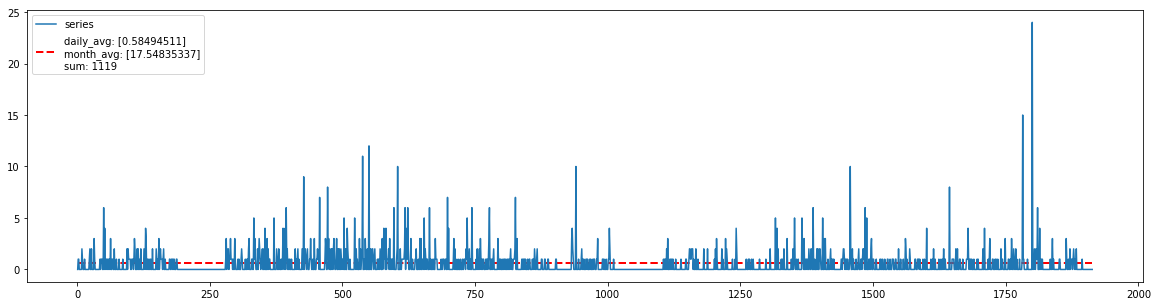

In [59]:
plot_item_series(df_sales_train_melt, 'FOODS_1_001_TX_1_validation')

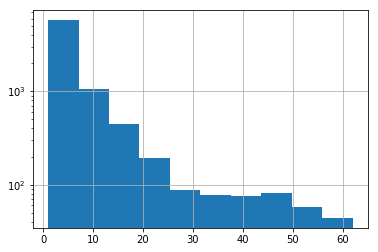

In [60]:
# Majority of 'sporadic' series have under 10 of matching events within the whole series
sporadic_series = df_sales_train_melt\
    .query('monthly_avg_count < sales')

sporadic_series_event_counts = sporadic_series\
    .groupby('id')\
    .agg({'id': 'count'})\
    .query('id > 0')['id']
sporadic_series_event_counts.hist(log=True)

In [61]:
sporadic_series.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales,daily_avg_count,monthly_avg_count
5611,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,1786,5,0.150549,4.516466


In [62]:
len(sporadic_series_event_counts) / float(len(df_sales_train))

0.25834699901607083

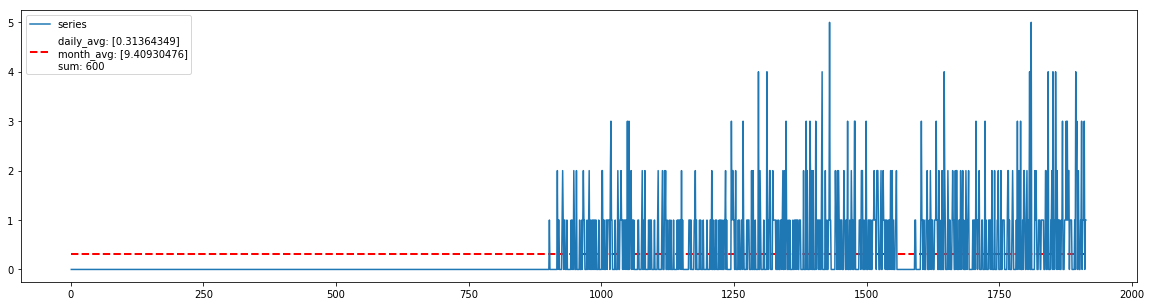

In [63]:
plot_item_series(df_sales_train_melt, 'HOBBIES_1_001_CA_1_validation')

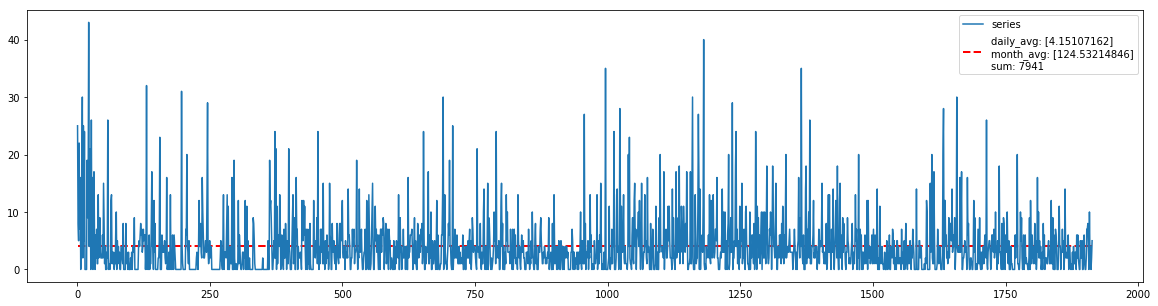

In [64]:
# this one is a bit more lively
# Note to self: after 2 hours I have no idea why this example was important :/
plot_item_series(df_sales_train_melt, 'HOBBIES_1_103_CA_1_validation')

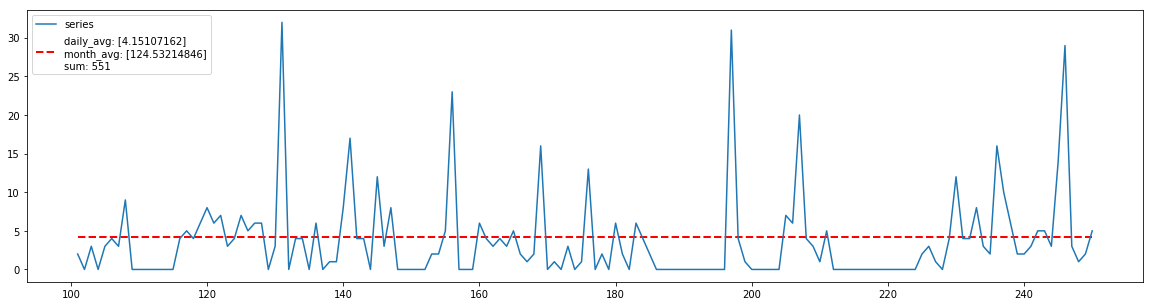

In [65]:
zoom = df_sales_train_melt.query('id == "HOBBIES_1_103_CA_1_validation"')[100:250]
plot_item_series(zoom, 'HOBBIES_1_103_CA_1_validation')

In [66]:
sales_agg[sales_agg['id']  == "HOBBIES_1_103_CA_1_validation"]

,id,sales_min,sales_max,sales_sum,sales_count,day_id_min,day_id_max,days,monthly_avg_count,daily_avg_count
15350,HOBBIES_1_103_CA_1_validation,0,43,7941,1913,1,1913,1913,124.532148,4.151072


In [67]:
import datetime
d_1_date = pd.to_datetime('2011-01-29')
d_1_date

Timestamp('2011-01-29 00:00:00')

In [68]:
%%time
# Note to self: datetime.date takes 2-4 times longer here. No idea why :/
mapping = {day:d_1_date + datetime.timedelta(days=day-1) for day in range(1, 1913+1)}
df_sales_train_melt['day_date'] = df_sales_train_melt['day_id'].map(mapping)

CPU times: user 534 ms, sys: 358 ms, total: 892 ms
Wall time: 893 ms


In [69]:
%%time
mapping = {day:str((d_1_date + datetime.timedelta(days=day-1)).date()) for day in range(1, 1913+1)}
# gonna need it for joining with calendars & stuff
df_sales_train_melt['day_date_str'] = df_sales_train_melt['day_id'].map(mapping)

CPU times: user 1.51 s, sys: 385 ms, total: 1.89 s
Wall time: 1.89 s


In [70]:
df_sales_train_melt.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales,daily_avg_count,monthly_avg_count,day_date,day_date_str
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0.313643,9.409305,2011-01-29,2011-01-29


In [71]:
df_sales_train_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 12 columns):
id                   category
item_id              category
dept_id              category
cat_id               category
store_id             category
state_id             category
day_id               int64
sales                int64
daily_avg_count      float64
monthly_avg_count    float64
day_date             datetime64[ns]
day_date_str         object
dtypes: category(6), datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 3.5+ GB


In [72]:
# or this FOODS_1_001_TX_1_validation, HOBBIES_1_103_CA_1_validation
# HOUSEHOLD_1_032_TX_1_validation: 62
# HOUSEHOLD_1_020_WI_2_validation: 61
sporadic_sample_name = 'FOODS_1_001_TX_1_validation'
sporadic_sample = df_sales_train_melt.query(f'id == "{sporadic_sample_name}"').copy()

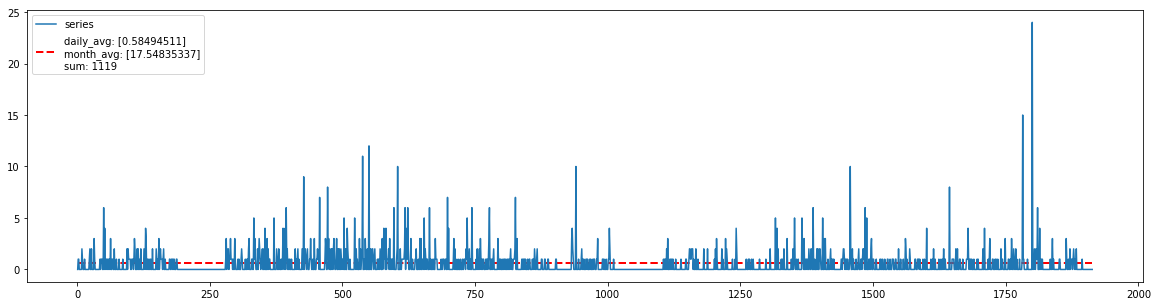

In [73]:
plot_item_series(df_sales_train_melt, sporadic_sample_name)

In [74]:
from IPython.display import display
import numpy as np

def extract_sporadic_month_counts(df):    
    df['month_id'] = (df['day_date'].dt.year - 2011) * 12 + df['day_date'].dt.month
    df['month'] = df['day_date'].dt.month
    df['year'] = df['day_date'].dt.year
    monthly_sales = df\
        .groupby(['id', 'month_id'])\
        .agg({'sales': 'sum'})\
        .reset_index()

    # remove them from being counted towards min while keeping them in the index, I bet there are cleaner ways
    absent = 999999999
    monthly_sales['sales_ind'] = np.where(monthly_sales['sales'] > 0, monthly_sales['month_id'], absent)
    monthly_sales['rollout_month_id'] = (
        monthly_sales
            .groupby('id')['sales_ind']
            .transform('min')
    )

    # select * from monthly_sales where sales == 0 and month_id > min(sales_id)
    # TODO: exclude intervals where products were not on sale
    no_sales_months = monthly_sales\
        .query('month_id >= rollout_month_id and sales == 0')
    
    no_sales_months = no_sales_months\
        .groupby(['id'])\
        .agg({'sales': 'count'})\
        .reset_index()\
        .rename({'sales': 'zero_sales_months'}, axis=1)\
        .query('zero_sales_months > 0')

    return no_sales_months
df = extract_sporadic_month_counts(sporadic_sample)

In [75]:
def validate_zero_sales_months(expected, cid):
    series = df_sales_train_melt.query(f'id == "{cid}"').copy()
    zero_sales_months = extract_sporadic_month_counts(series)['zero_sales_months'].to_numpy()[0]
    assert zero_sales_months == expected, f"Re-rolled supposed to have {expecged} months counted as zero sales, had {zero_sales_months}"

validate_zero_sales_months(22, 'HOUSEHOLD_1_032_TX_1_validation') # re-enrolled product
validate_zero_sales_months(4,  'FOODS_1_001_TX_1_validation')     # just an example

In [76]:
%%time
# TODO: proper naming is the future, saving your work is now
no_sales_months_counts = extract_sporadic_month_counts(df_sales_train_melt)

CPU times: user 13.6 s, sys: 8.5 s, total: 22.1 s
Wall time: 20.4 s


In [77]:
no_sales_months_counts.sort_values('zero_sales_months', ascending=False)[0:5]

,id,zero_sales_months
25043,HOUSEHOLD_1_512_CA_4_validation,57
3216,FOODS_2_107_TX_3_validation,56
22731,HOUSEHOLD_1_278_CA_2_validation,56
6086,FOODS_2_394_TX_3_validation,54
3476,FOODS_2_133_TX_3_validation,53


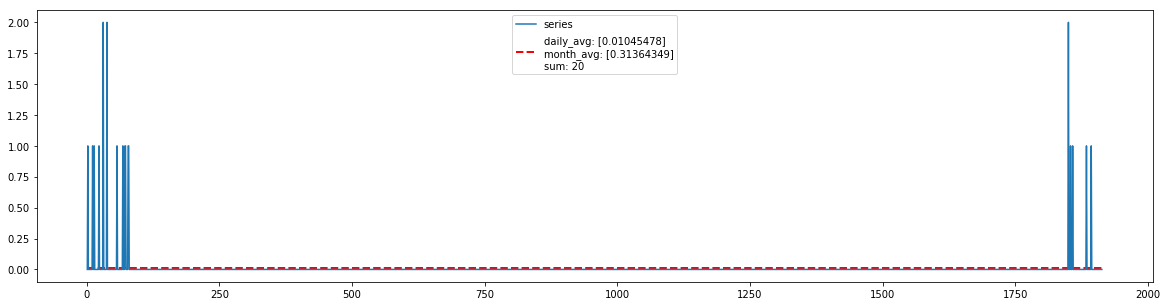

In [78]:
# well well well, look who is here, I definitely need to get back to that cumsum or whatever idea
plot_item_series(df_sales_train_melt, 'HOUSEHOLD_1_512_CA_4_validation')

In [79]:
df_prices.head(1)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58


In [80]:
df_sales_train_melt.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales,daily_avg_count,monthly_avg_count,day_date,day_date_str,month_id,month,year
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0.313643,9.409305,2011-01-29,2011-01-29,1,1,2011


In [81]:
df_calendar.head(1)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0


In [82]:
len(df_sales_train_melt)

58327370

In [83]:
df_sales_train_melt.drop(['day_date'], axis=1, inplace=True)

In [84]:
%%time
df_sales_train_melt = df_sales_train_melt.merge(
    # Note to self: merging all the fields in blows up the dataframe size to 10G
    # subsequent attempt to merge the prices in dies
    df_calendar[['date', 'wm_yr_wk']],
    left_on='day_date_str', right_on='date')

CPU times: user 27.7 s, sys: 13.6 s, total: 41.3 s
Wall time: 43.4 s


In [85]:
df_sales_train_melt.head(1)

,id,item_id,dept_id,cat_id,store_id,state_id,day_id,sales,daily_avg_count,monthly_avg_count,day_date_str,month_id,month,year,date,wm_yr_wk
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,1,0,0.313643,9.409305,2011-01-29,1,1,2011,2011-01-29,11101


In [86]:
df_prices.head(1)

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58


In [87]:
len(df_sales_train_melt)

58327370

In [88]:
df_sales_train_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 16 columns):
id                   category
item_id              category
dept_id              category
cat_id               category
store_id             category
state_id             category
day_id               int64
sales                int64
daily_avg_count      float64
monthly_avg_count    float64
day_date_str         object
month_id             int64
month                int64
year                 int64
date                 object
wm_yr_wk             int64
dtypes: category(6), float64(2), int64(6), object(2)
memory usage: 5.2+ GB


In [94]:
%%time
# Note to self: forgot to include wm_yr_wk (= results boom O(n_weeks)) --> had to do fields penny pinching upstream
t = df_sales_train_melt.merge(
    df_prices,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

CPU times: user 39.2 s, sys: 39.2 s, total: 1min 18s
Wall time: 1min 33s


In [95]:
len(t)

58327370

In [100]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58327370 entries, 0 to 58327369
Data columns (total 17 columns):
id                   category
item_id              object
dept_id              category
cat_id               category
store_id             object
state_id             category
day_id               int64
sales                int64
daily_avg_count      float64
monthly_avg_count    float64
day_date_str         object
month_id             int64
month                int64
year                 int64
date                 object
wm_yr_wk             int64
sell_price           float64
dtypes: category(4), float64(3), int64(6), object(4)
memory usage: 6.4+ GB


In [101]:
df_sales_train_melt = t

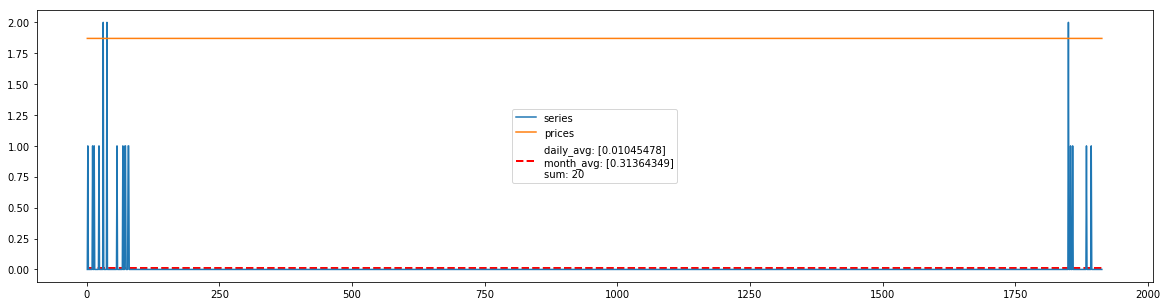

In [110]:
plot_item_series(df_sales_train_melt, 'HOUSEHOLD_1_512_CA_4_validation')

In [112]:
# Quite a sporadic thing, it seems: was for sale all the time, fell out of favor and regained attention just recently :/
sell_prices = df_sales_train_melt.query('id == "HOUSEHOLD_1_512_CA_4_validation"')['sell_price']
sell_prices.unique(), len(sell_prices)

(array([1.87]), 1913)

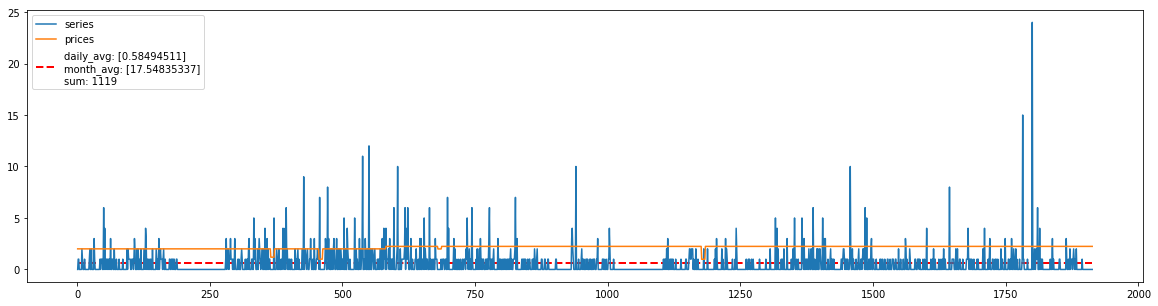

In [113]:
# Curious if the most price growth below beats inflation in any way :/
plot_item_series(df_sales_train_melt, 'FOODS_1_001_TX_1_validation')

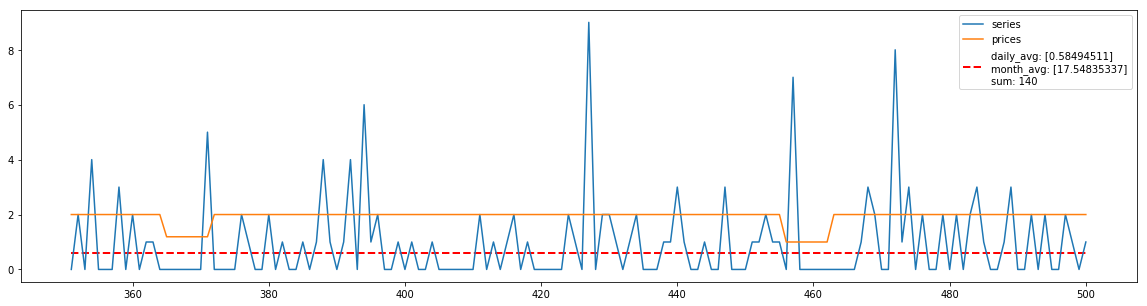

In [116]:
# (?) promotions possibly coupled with dips in price might be causing an individual consumers to respond
zoom = df_sales_train_melt.query('id == "FOODS_1_001_TX_1_validation"')[350:500]
plot_item_series(zoom, 'FOODS_1_001_TX_1_validation')

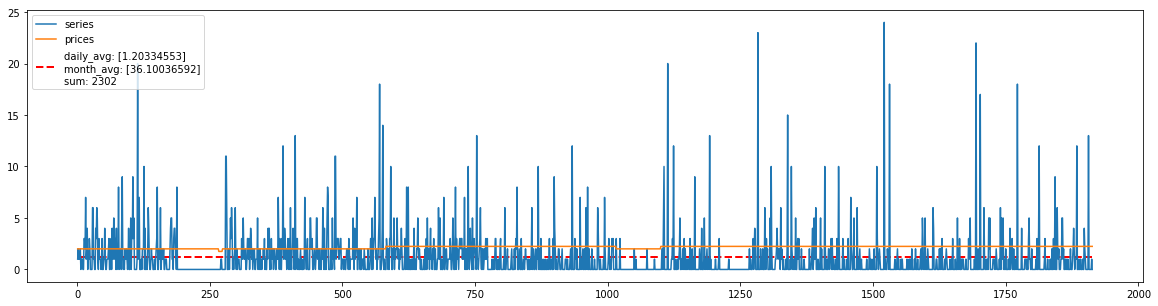

In [120]:
# sales in CA seem to be higher overall, two characteristic dips still there but the 3rd shop:/
# can it be a popular shop selling out and waiting for a refill?
# all WI had a similar picture but much smaller sales overall
plot_item_series(df_sales_train_melt, 'FOODS_1_001_CA_3_validation')